In [2]:
import sys
import pandas as pd
import numpy as np
import collections

import matplotlib.mlab as mlab  
import matplotlib.pyplot as plt
from pylab import mpl

from matplotlib import font_manager as fm
from  matplotlib import cm

In [3]:
mpl.rcParams['font.sans-serif'] = ['STSong'] # 指定默认字体 如果在自己机器上运行可能需要修改这里
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [4]:
class Shanghan():
    def __init__(self):
        self.sh1 = pd.read_json('data/SH_ty2.json')
        self.wx1 = pd.read_json('data/WX_yao.json')
        self.wx = {y: sx for sx, yao in self.wx1.loc["药物"].iteritems() for y in yao}
        
    def count_fang(self,fang):
        a = self.sh1.loc['名'].str.match(fang).sum()
        print(a)
        
    def count_fang_all(self):
        plt.style.use('fivethirtyeight')#这个图的设定字体很清晰
        plt.rcParams['figure.figsize'] = [18,13]
        #plt.xlabel('药物')
        plt.title(u'伤寒论重复方剂出现排名分析(前5名)', pad = 90)
        plt.xticks(fontsize=25)#x轴的字体大小
        plt.yticks(fontsize=30)
        
        l1 = {}
        t_list = []
        n_list = []
        for i in self.sh1.loc['名'].items():
            l1[i[1]] = self.sh1.loc['名'].str.match(i[1]).sum()
        l2 = sorted(l1.items(),key = lambda item: item[1],reverse=True)#按照数值的大小排序
        
        for i in l2[:5]:
            t_list.append(i[0])
            n_list.append(i[1])
            #plt.text(i[1],)
        
        x = np.arange(10)
        ys = [i+x+(i*x)**2 for i in range(10)]
        colors = cm.rainbow(np.linspace(0, 1, len(ys)))
            
        plt.bar(t_list,n_list,color=colors)
        plt.show()
        #print(l2)
        
    def count_yao(self,yao):
        q1 = self.sh1.loc['方']
        q2 = q1[q1.apply(lambda x:yao in x)].count()
        print(q2)
        
    def count_yao_all(self):
        q1 = self.sh1.loc['方']
        l1 = {}
        for i ,j in self.sh1.loc['方'].iteritems():
            for g in j:
                l1[g]= q1[q1.apply(lambda x:g in x)].count()
        l2 = sorted(l1.items(),key = lambda item: item[1],reverse=True)
                
        print(l2)
        
    def draw_dir_all(self):#
        plt.rcParams['figure.figsize'] = [18,13]
        plt.style.use('fivethirtyeight')
        
        fang = self.sh1.loc['方']
        sx = [self.wx.get(y,"暂不明") for f in fang for y in f]
        sx_len = len(sx)
        qq = {y: cnt / sx_len for y, cnt in collections.Counter(sx).items()}
        qq1 = sorted(qq.items(),key = lambda item: item[1], reverse=True)
        ss = {}
        for i in qq1:#把list变成dict,为了画饼图
            ss[i[0]]=i[1]
        
        #----------------下面是画饼图-----------------------------------
        
        labels = list(ss.keys())
        X = list(ss.values())
        fig, ax = plt.subplots(figsize=(18,13))
        
        colors = cm.rainbow(np.arange(len(X))/len(X))
        patches, texts, autotexts = ax.pie(X, labels=labels, autopct='%1.2f%%',
        shadow=False, startangle=170, colors=colors)
        
        proptease = fm.FontProperties()
        proptease.set_size('x-large')
        
        plt.setp(autotexts, fontproperties=proptease)
        plt.setp(texts, fontproperties=proptease)

        plt.title("伤寒全部方剂五行方向图", pad = 30)
        plt.axis('equal')
        plt.show()  
        
    def count_yao_all_draw(self):
        plt.style.use('fivethirtyeight')#这个图的设定字体很清晰
        plt.rcParams['figure.figsize'] = [18,13]
        #plt.xlabel('药物')
        plt.title('伤寒论药物用量排名分析(前10名)', pad = 90)
        plt.xticks(fontsize=25)#x轴的字体大小
        plt.yticks(fontsize=30)
        plt.ylabel('该药在伤寒中出现次数(单位,次)')#y的描述
        
        
        q1 = self.sh1.loc['方']
        l1 = {}
        t_list = []
        n_list = []
        for i ,j in self.sh1.loc['方'].iteritems():
            for g in j:
                l1[g]= q1[q1.apply(lambda x:g in x)].count()
        l2 = sorted(l1.items(),key = lambda item: item[1],reverse=True)
            
        for i in l2[:10]:
            t_list.append(i[0])
            n_list.append(i[1])
            #plt.text(i[1],)
        
        x = np.arange(10)
        ys = [i+x+(i*x)**2 for i in range(10)]
        colors = cm.rainbow(np.linspace(0, 1, len(ys)))
            
        plt.bar(t_list,n_list,color=colors)
        plt.show()
    
    def find_fang(self, fang):
        b = self.sh1.loc['名'].apply(lambda x: x)
        c = b[b.apply(lambda x: fang == x)].index[0]
        d = self.sh1[c]
        print(d['名'])
        print(".........")
        print(str(pd.Series(d['经'])))
        print(".........")
        print(pd.Series(d['证']))
        print(".........")
        print(pd.Series(d['方']))
        print(".........")
        print(pd.Series(d['原文']))
        
    def bianzheng(self,zheng):#根据证输出对应方剂(简单根据伤寒的对应,而非根据心法)
        #zheng这里要用大括号
        a = self.sh1.loc['证'].apply(lambda x: set(x['体证']))
        b = a[a.apply(lambda x: zheng <= x)].index
        c = list(self.sh1[b].loc['名'])
        
        if c == []:
            print("暂时没有找到")
        else:
            print("找到如下方剂:")
            print(c)
            
    def draw_dir(self,f):
        plt.rcParams['figure.figsize'] = [6,6]
        plt.style.use('fivethirtyeight')#这个图的设定字体很清晰
        
        b = self.sh1.loc['名'].apply(lambda x: x)
        c = b[b.apply(lambda x: f == x)].index[0]
        d = self.sh1[c]
        fang = d.loc['方']
        sx = [self.wx.get(y, "暂不明") for y in fang]
        fang_len = len(fang)
        qq = {s: cnt / fang_len for s, cnt in collections.Counter(sx).items()}  #字典解析
        
        #----------------下面是画饼图-----------------------------------
         
        labels = list(qq.keys())
        X = list(qq.values())
        fig, ax = plt.subplots(figsize=(6,6))
        
        colors = cm.rainbow(np.arange(len(X))/len(X))
        patches, texts, autotexts = ax.pie(X, labels=labels, autopct='%1.2f%%',
        shadow=False, startangle=170, colors=colors)
        
        proptease = fm.FontProperties()
        proptease.set_size('large')
        
        title = str(f)+'的五行方向图'
        
        plt.setp(autotexts, fontproperties=proptease)
        plt.setp(texts, fontproperties=proptease)
        
        
        plt.title(title, pad = 30)
        plt.axis('equal')
        plt.show()
            
        
        
        

In [5]:
b1 = Shanghan()

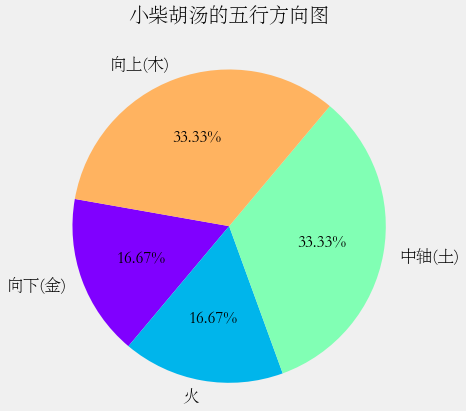

In [6]:
b1.draw_dir('')

In [7]:
b1.bianzheng({'怕风'})

找到如下方剂:
['桂枝汤', '桂枝加葛根汤', '桂枝加附子汤', '葛根汤', '麻黄汤', '桂枝汤', '麻黄汤', '蜜煎', '桂枝汤', '茵陈蒿汤', '桂枝汤', '桂枝加芍药汤', '桂枝加大黄汤', '麻黄细辛附子汤', '麻黄附子甘草汤', '黄连阿胶汤', '附子汤', '桃花汤', '吴茱萸汤', '猪肤汤', '甘草汤', '桔梗汤', '苦酒汤', '半夏散及汤', '白通汤', '白通加猪胆汁汤', '桂枝汤', '吴茱萸汤', '桂枝汤']


In [8]:
b1.find_fang('桂枝汤')

桂枝汤
.........
阴阳     阳
三经    太阳
dtype: object
.........
体证    [发热, 鼻涕, 怕冷, 怕风, 干呕, 头痛, 出汗]
脉证                          [阳浮阴弱]
dtype: object
.........
桂枝      3两
芍药      3两
炙甘草     2两
生姜      3两
大枣     12枚
dtype: object
.........
对应证原文    [太阳中风，阳浮而阴弱，阳浮者热自发，阴弱者汗自出，啬啬恶寒，淅淅恶风，翕翕发热，鼻鸣乾呕者...
方剂原文     桂枝三两，去皮，味辛热；芍药三两，味苦酸，微寒；甘草二两，炙，味甘平；生姜三两，切，味辛温；...
服药原文     右伍味，㕮咀，以水柒升，微火煮取三升，去滓，适寒温，服壹升。服已须臾，歠热稀粥壹升馀，以助药...
dtype: object


In [9]:
b1.count_fang('四逆汤')

6


In [15]:
b1.find_fang('桂枝加葛根汤')

桂枝加葛根汤
.........
阴阳     阳
三经    太阳
dtype: object
.........
体证    [肌肉酸痛, 怕风]
脉证           [无]
dtype: object
.........
葛根      4两
桂枝      3两
芍药      2两
炙甘草     2两
生姜      3两
大枣     12两
麻黄      3两
dtype: object
.........
对应证原文    [太阳病，项背强几几，反汗出恶风者，桂枝加葛根汤主之。, 太阳与阳明合病者，必自下利，葛根汤主之]
方剂原文     葛根汤方：葛根四两；麻黄三两，去节；桂二两，去皮；芍药二两，切；甘草二两，炙；生姜三两，切；...
服药原文     右柒味，㕮咀，以水一斗，先煮麻黄、葛根，减二升，去沫，内诸药，煮取三升，去滓，温服一升，覆取...
dtype: object


In [11]:
b1.find_fang('桂枝加附子汤')

桂枝加附子汤
.........
阴阳     阳
三经    太阳
dtype: object
.........
体证    [大量出汗不止, 怕风, 小便难, 四肢难以屈伸]
脉证                       [阳浮阴弱]
dtype: object
.........
附子      1两
桂枝      3两
芍药      3两
炙甘草     3两
生姜      3两
大枣     12枚
dtype: object
.........
对应证原文          [太阳病，发汗，遂漏不止，其人恶风，小便难，四支微急，难以屈伸者，桂枝加附子汤主之。]
方剂原文     桂枝三两,去皮,芍药三两,甘草二两,炙 生姜三两,切, 大枣十二枚,擘, 附子一枚,炮,去皮...
服药原文              右六味。以水七升。煮取三升。去滓。温服一升。本云。桂枝汤。今加附子。将息如前法。
dtype: object


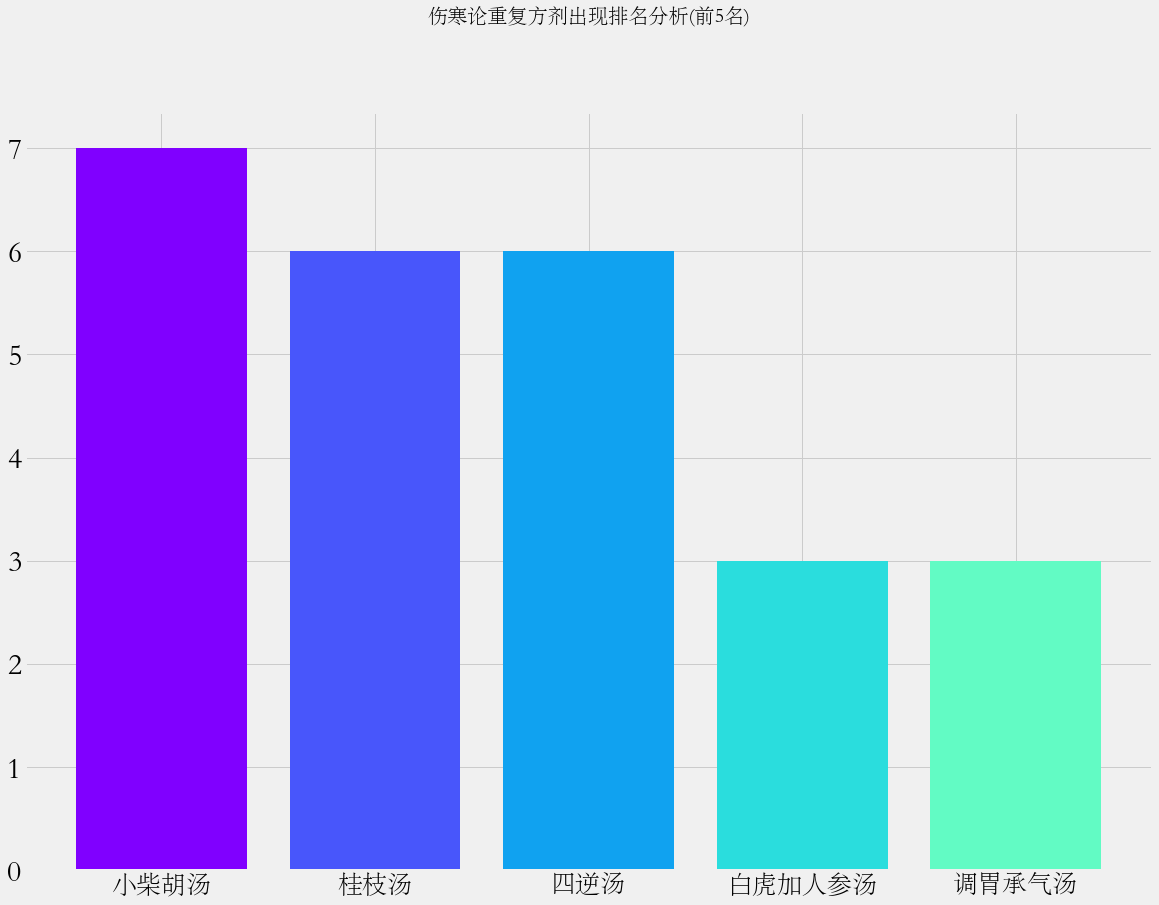

In [12]:
b1.count_fang_all()

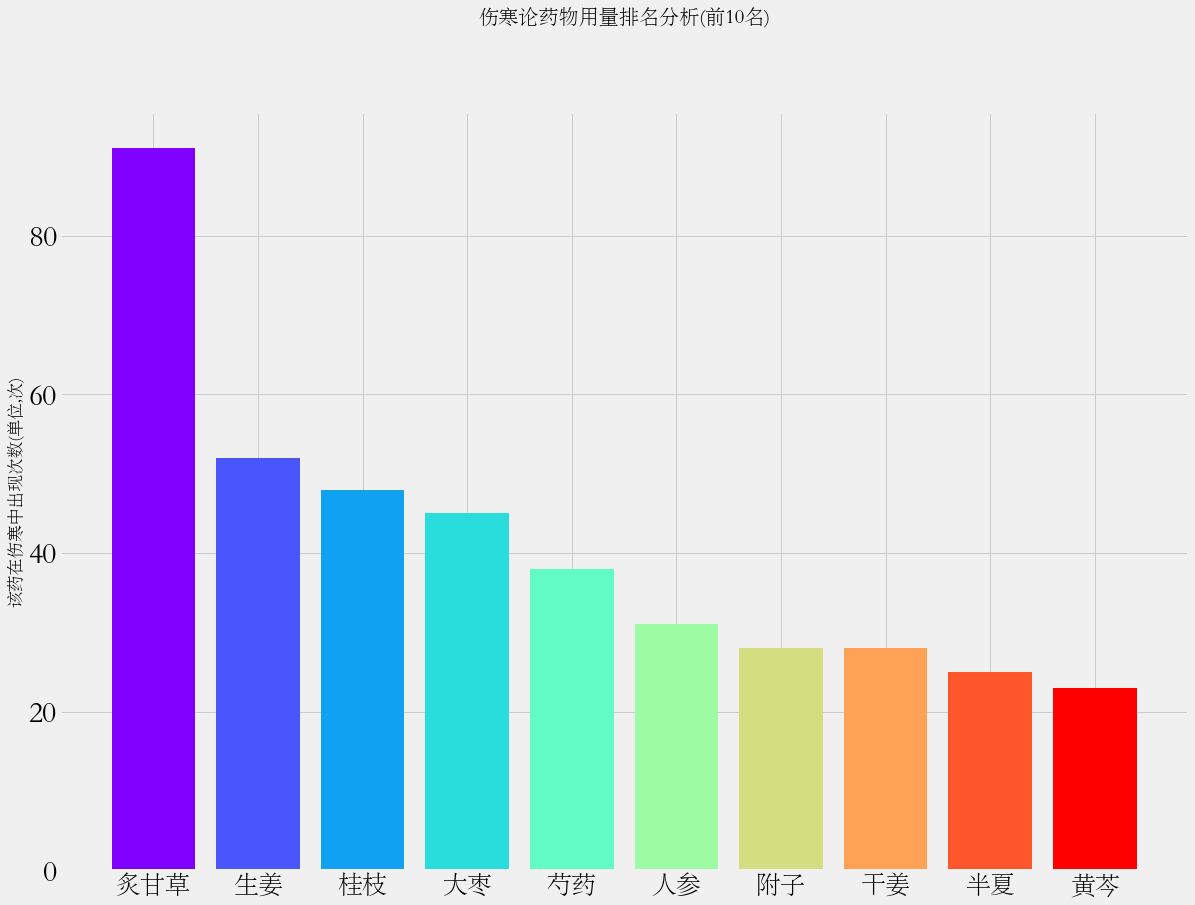

In [13]:
b1.count_yao_all_draw()

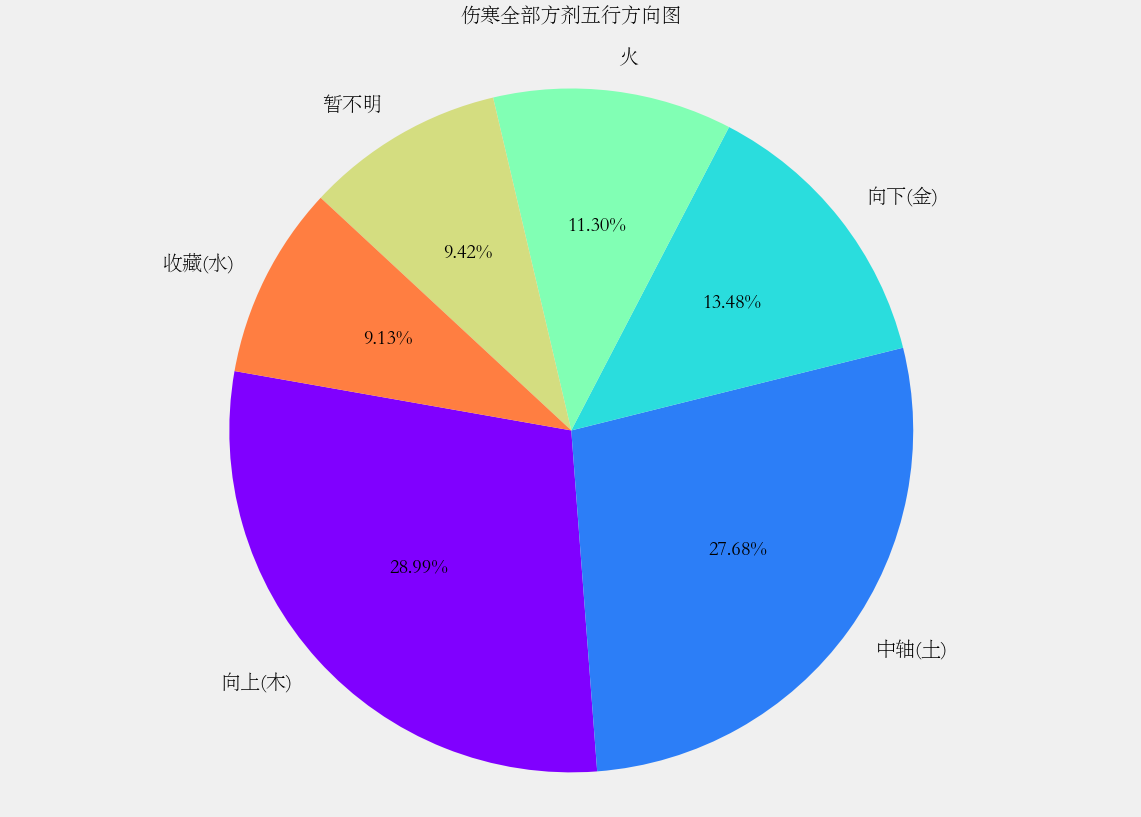

In [14]:
b1.draw_dir_all()